<a href="https://colab.research.google.com/github/ge96lip/Quantum-Computing/blob/main/QC_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites

In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install qiskit-ibm-runtime
!pip install cirq

In [ ]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    import cirq

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import scipy
import scipy.special

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

# Exercise I -  Programming Quantum Arithmetics with Qiskit - Increment and Decrement

In [ ]:
# Function to plot circle notation
def plot_circle_notation(statevector, n_qubits, title='Quantum State'):
    n_states = len(statevector)
    # Compute amplitude and phase
    amplitudes = np.abs(statevector)
    phases = np.angle(statevector)
    # Visualization parameters
    rows = int(np.ceil(n_states / 8.0))
    cols = min(n_states, 8)
    fig, axs = plt.subplots(rows, cols, figsize=(2*cols, 2*rows))
    axs = np.atleast_1d(axs)  # Ensure axs is iterable
    for idx in range(n_states):
        row = idx // cols
        col = idx % cols
        amp = amplitudes[idx]
        phase = phases[idx]
        # Create circles
        circleExt = patches.Circle((0.5, 0.5), 0.5, color='gray', alpha=0.1)
        circleInt = patches.Circle((0.5, 0.5), amp/2, color='b', alpha=0.3)
        ax = axs[col] if rows == 1 else axs[row, col]
        ax.add_patch(circleExt)
        ax.add_patch(circleInt)
        ax.set_aspect('equal')
        state_number = "|" + format(idx, '0' + str(n_qubits) + 'b') + ">"
        ax.set_title(state_number)
        xl = [0.5, 0.5 + 0.5 * amp * np.cos(phase + np.pi/2)]
        yl = [0.5, 0.5 + 0.5 * amp * np.sin(phase + np.pi/2)]
        ax.plot(xl, yl, 'r')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

In [ ]:
def add_increment(circuit):
    circuit.ccx(0, 1, 2) # Carry the one to qubit 2, when qubits 0 and 1 are |11>
    circuit.cx(0, 1)     # Carry the one to qubit 1, when qubit 0 is |1>
    circuit.x(0)         # Add one to qubit 0

In [ ]:
def add_decrement(circuit):
    """
    Applies a decrement operation to the quantum circuit.
    Subtracts 1 from a binary number represented by the qubits in the circuit.

    Args:
    circuit (QuantumCircuit): The quantum circuit on which to apply the decrement.
    """
    # Reverse the operation of carry propagation (compared to increment)
    circuit.x(0)         # Subtract one from qubit 0 (flip the qubit)
    circuit.cx(0, 1)     # Borrow from qubit 1 if qubit 0 is zero
    circuit.ccx(0, 1, 2) # Borrow from qubit 2 if qubits 0 and 1 are both zero

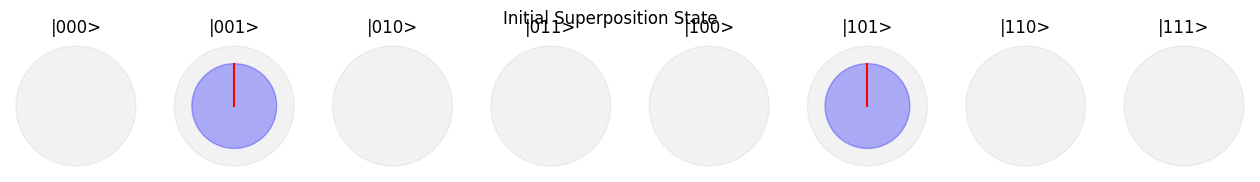

In [ ]:
# Number of qubits
n_qubits = 3

# Create quantum circuit with 3 qubits
qc = QuantumCircuit(n_qubits)

# Initialize qubits to create superposition between |001> and |101>

# Set up qubits to create the superposition of |1> and |5>
qc.x(0)  # This puts qubit 0 in state |1>
qc.h(2)  # This puts qubit 2 in superposition (to affect |101>)

v1 = Statevector(qc)

#print(np.real_if_close(v1.data))

# Plot the quantum states using circle notation
plot_circle_notation(v1, n_qubits, title='Initial Superposition State')

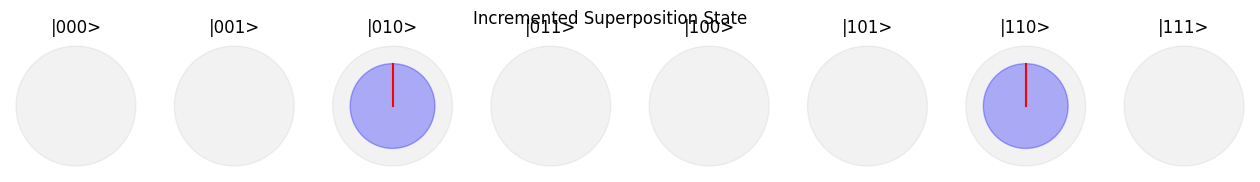

In [ ]:
# Increment the number encoded in the state vector
add_increment(qc)
v2 = Statevector(qc)
#print(np.real_if_close(v2.data))

# Plot the quantum states using circle notation
plot_circle_notation(v2, n_qubits, title='Incremented Superposition State')

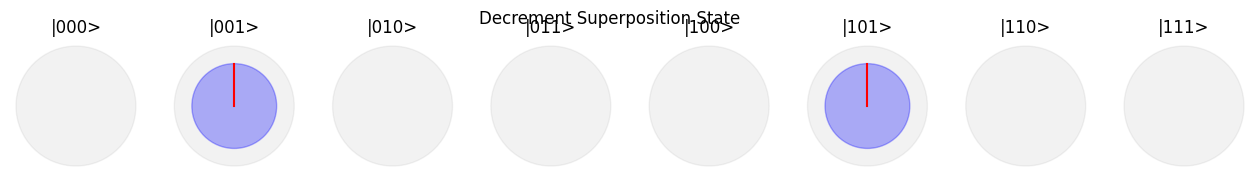

In [ ]:
# Decrement the number encoded in the state vector
add_decrement(qc)
v3 = Statevector(qc)
#print(np.real_if_close(v3.data))


# Plot the quantum states using circle notation
plot_circle_notation(v3, n_qubits, title='Decrement Superposition State')

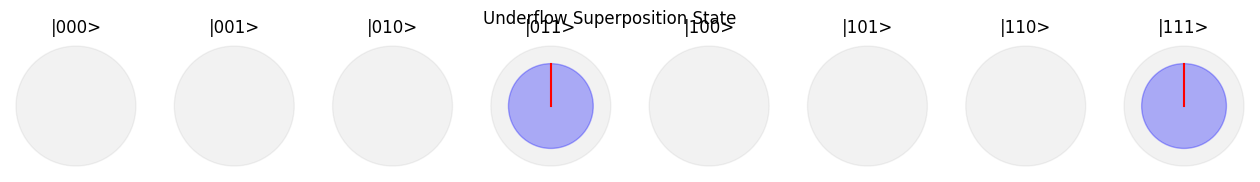

In [ ]:
# Increment the number encoded in the state vector
add_decrement(qc)
add_decrement(qc)
v4 = Statevector(qc)
#print(np.real_if_close(v4.data))

# Plot the quantum states using circle notation
plot_circle_notation(v4, n_qubits, title='Underflow Superposition State')

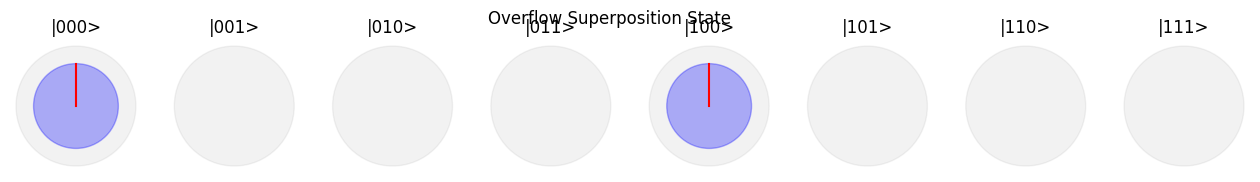

In [ ]:
# Increment the number encoded in the state vector
add_increment(qc)
v5 = Statevector(qc)
#print(np.real_if_close(v5.data))

# Plot the quantum states using circle notation
plot_circle_notation(v5, n_qubits, title='Overflow Superposition State')

> What happens if we have an overflow (for the increment) or underflow (for the decrement)?

When an increment or decrement operation is applied to a quantum state that is already at its maximum or minimum value (i.e., no further increment or decrement is possible), the operation results in the qubits wrapping around to the opposite side of the state space. For instance, in the case of overflow during an increment, the qubits reset to their lowest state, whereas in underflow during a decrement, the qubits shift to their highest possible state.

Increment/Decrement on Negative Numbers: When using two’s complement representation, both increment and decrement operations will correctly handle transitions between positive and negative numbers.

Overflow and Underflow: Overflow and underflow in this system will still wrap around as in a classical system. For instance, incrementing the maximum positive number (e.g., 0111 for +7 in a 4-qubit system) will result in the minimum negative number (1000, representing -8).

Example: If you were to start with |111⟩, representing -1 in two's complement, the increment operation would move the qubits to |000⟩ (0), while the decrement operation would move the state to |110⟩, which represents -2.

# Exercise II -  Programming the Quantum Fourier Transform (QFT)

In [ ]:
def init_quantum_register():
    qc = QuantumCircuit(3)
    qc.x(0)
    test = Statevector(qc)
    plot_circle_notation(test, 3, title='Test Superposition State')

# Bonus Exercise - Implement a 1D Discrete Quantum Walk

## Task B.1
Implement a Discrete Quantum Walk on a line with 128 possible positions, requiring seven qubits for the position register. You can initialize the walker position in your lattice's middle (or so). A coin qubit will control the quantum walk, determining the direction of the walker’s movement.  You can use Qiskit or Cirq simulators, or a quantum software of your choice. Plot the quantum circuit you designed for ten iterations of the quantum walk.

In [ ]:
number_qubits = 7 # for position register
position_qubits = cirq.LineQubit.range(number_qubits)
#print(position_qubits)

def initial_state():

    # Initialize walker position in the middle
    yield cirq.X(cirq.LineQubit(0)) # Qubit 0 is MSB

In [ ]:
def walk_step(coin=None):

    if coin==None: # DEFAULT
        # "Flip" the coin vector
        yield cirq.H(cirq.LineQubit(number_qubits))
    elif coin==1:
        # Put the coin vector in state |1⟩
        yield cirq.X(cirq.LineQubit(number_qubits))

    # Implement the Increment Operator
    for i in range(number_qubits, 0, -1):

        controls = [cirq.LineQubit(v) for v in range(number_qubits, i-1, -1)]
        yield cirq.X(cirq.LineQubit(i-1)).controlled_by(*controls)
        if (i > 1):
            yield cirq.X(cirq.LineQubit(i-1))

    # Invert coin vector
    yield cirq.X(cirq.LineQubit(number_qubits))

    # Implement the Decrement Operator
    for i in range(1, number_qubits+1):

        controls = [cirq.LineQubit(v) for v in range(number_qubits, i-1, -1)]
        yield cirq.X(cirq.LineQubit(i-1)).controlled_by(*controls)
        if (i < number_qubits):
            yield cirq.X(cirq.LineQubit(i))

    # Invert coin vector
    yield cirq.X(cirq.LineQubit(number_qubits))

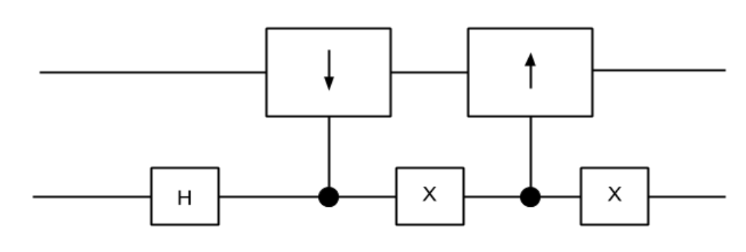

In [ ]:
def generate_quantum_walk(number_qubits, iterator, coin=None, show_circ=False):

    QW_circuit = cirq.Circuit()
    QW_circuit.append(initial_state())

    for j in range(iterator):
        QW_circuit.append(walk_step(coin))
    QW_circuit.append(cirq.measure(*position_qubits, key='x'))

    if show_circ==True:
        print(QW_circuit)

    return QW_circuit

QW_circuit = generate_quantum_walk(number_qubits, iterator=10, show_circ=True)


0: ───X───────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X─────

In [ ]:
def test_QW_circuit(number_qubits, iterations=1, sample_number=1000, coin=None):
    simulator = cirq.Simulator()
    circuit = generate_quantum_walk(number_qubits, iterator=iterations, coin=coin)
    result = simulator.run(circuit, repetitions=sample_number)
    final = result.histogram(key='x')
    print(final)

print('Initial walker position: ')
QW_state_initial = test_QW_circuit(number_qubits, iterations=0)
print('Walker position after one step with coin in |0⟩ state: ')
QW_state_one_direction = test_QW_circuit(number_qubits, iterations=1, coin=0)
print('Walker position after one step with coin in |1⟩ state: ')
QW_state_other_direction = test_QW_circuit(number_qubits, iterations=1, coin=1)
print('Walker position after one step with coin in random state: ')
QW_state_random_direction = test_QW_circuit(number_qubits, iterations=1)

Initial walker position: 
Counter({64: 1000})
Walker position after one step with coin in |0⟩ state: 
Counter({63: 1000})
Walker position after one step with coin in |1⟩ state: 
Counter({65: 1000})
Walker position after one step with coin in random state: 
Counter({65: 505, 63: 495})


## Task B.2
Plot the distribution of your measurements running your circuit for 10, 20, and 30 walker iterations using a quantum computer simulator. Comment on the distributions you obtained: how do they compare to the classical random walk? Are they symmetric? Is the walk faster, slower, or slower than the classical random walk? What is the quantum effect that impacts the quantum walk?

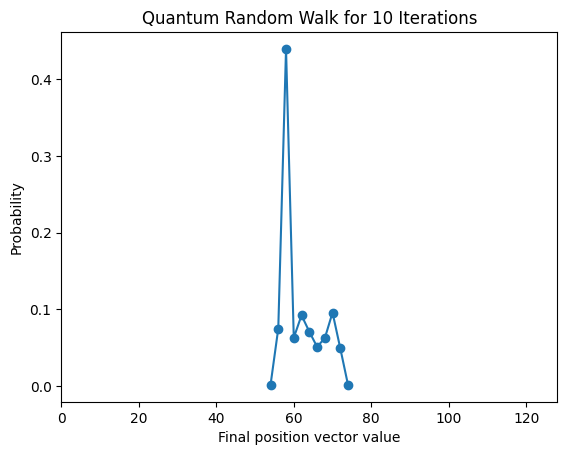

Counter({58: 2198, 70: 478, 62: 460, 56: 374, 64: 354, 60: 314, 68: 310, 66: 255, 72: 245, 74: 6, 54: 6})


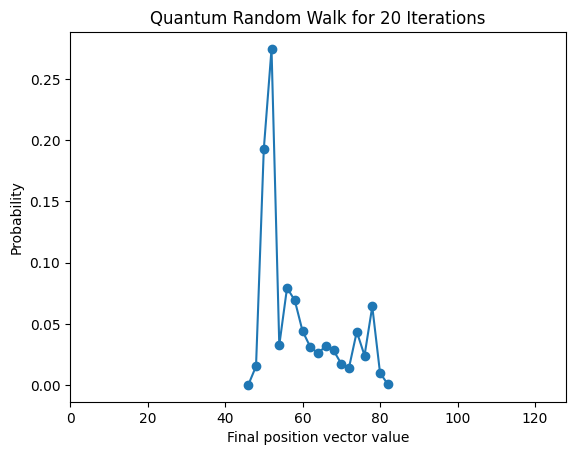

Counter({52: 1372, 50: 962, 56: 397, 58: 346, 78: 321, 60: 221, 74: 218, 54: 163, 66: 160, 62: 156, 68: 142, 64: 130, 76: 121, 70: 87, 48: 77, 72: 72, 80: 50, 82: 4, 46: 1})


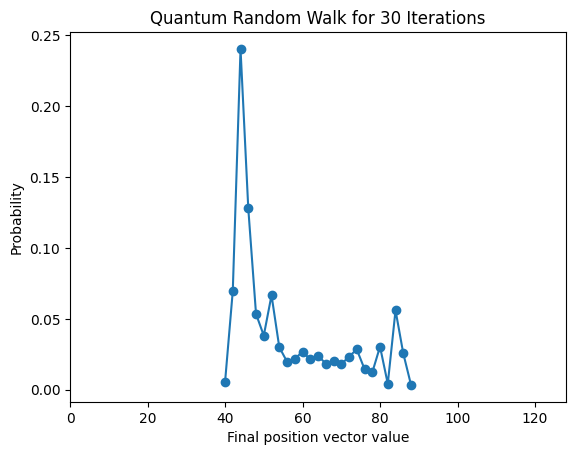

Counter({44: 1201, 46: 639, 42: 348, 52: 333, 84: 280, 48: 267, 50: 191, 80: 152, 54: 150, 74: 142, 60: 134, 86: 128, 64: 120, 72: 117, 58: 109, 62: 107, 68: 103, 56: 99, 66: 92, 70: 90, 76: 73, 78: 61, 40: 26, 82: 21, 88: 17})


In [ ]:
def graph(final):

    x_arr = list(final.keys())
    y_arr = [dict(final)[j] for j in dict(final).keys()] # Number of occurences
    y_arr = [y / sum(y_arr) for y in y_arr] # Normalize number of occurences to represent probabilities

    x_arr_final = []
    y_arr_final = []

    while (len(x_arr) > 0):

        x_arr_final.append(min(x_arr))
        y_arr_final.append(y_arr[x_arr.index(min(x_arr))])
        holder = x_arr.index(min(x_arr))
        del x_arr[holder]
        del y_arr[holder]

    plt.plot(x_arr_final, y_arr_final)
    plt.scatter(x_arr_final, y_arr_final)
    plt.xlim(0,pow(2,number_qubits))
    plt.xlabel('Final position vector value')
    plt.ylabel('Probability')
    plt.show()


def simulate_circuit(number_qubits=7, iterations=10, sample_number=5000, plot=False, show_circ=False):
    simulator = cirq.Simulator()
    circuit = generate_quantum_walk(number_qubits, iterator=iterations, show_circ=show_circ)
    result = simulator.run(circuit, repetitions=sample_number)
    final = result.histogram(key='x')

    if plot==True:
        plt.title(f'Quantum Random Walk for {iterations} Iterations')
        graph(final)

    return final

simulation_10 = simulate_circuit(number_qubits, iterations=10, sample_number=5000, plot=True)
print(simulation_10)
simulation_20 = simulate_circuit(number_qubits, iterations=20, sample_number=5000, plot=True)
print(simulation_20)
simulation_30 = simulate_circuit(number_qubits, iterations=30, sample_number=5000, plot=True)
print(simulation_30)

The plots show the probability distribution for the position of the walker. Note that the graphs will only have either even or odd numbered data point, depending on the initial position of the walker and the number of steps taken. In this case the walker position is initialized as the middle of the lattice (which is an even number) and an even number of iterations is performed. That is why the final positions of the walker are only even numbers in this case.

> Is the quantum random walk faster, equal or slower than the classical random walk?

The quantum random walk is quadratically faster than the classical random walk.\
Classical random walk: $\sigma^2≈T$ (standard deviation $\sigma^2$ is proportional to the number of steps $T$ of the random walk).\
Quantum random walk: $\sigma^2≈T^2$ (standard deviation $\sigma^2$ is proportional to the square of the number of steps $T$ of the random walk).\
Standard deviation in quantum case grows at a quadratically faster rate than in the classical case.

> What is the difference between the obtained distributions and those of the classical random walk?

In the classical case, we expect a binominal probability distribution centered around the initial walker position. However, in the quantum case we obtained a probability distribution that is not centered, even though the walker position was initialized as the middle of the lattice.

> Are the obtained distributions symmetric?

The obtained probability distributions are not symmetric. We observe a large peak at the left side of the center and additionally a smaller peak on the right side. For 30 iterations, we obtain the large peak ($>20\%$) at the value 44 and the small peak ($<10\%$) at 84, whereas the value 64 is the initial position of the walker. However, we observe that the positions of the peaks are indead symmetric from the center, but they are not equally likely.

> What is the quantum effect that impacts the quantum walk?

In the quantum experiment, the coin qubit is in superposition of the states |0⟩ and |1⟩. The superposition of the two states seems to be the reason for observing two peaks instead of only one as in the classical case.


0: ───X──────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X──────────────────────────────────────────────────────────────────────────────────────────────────────────

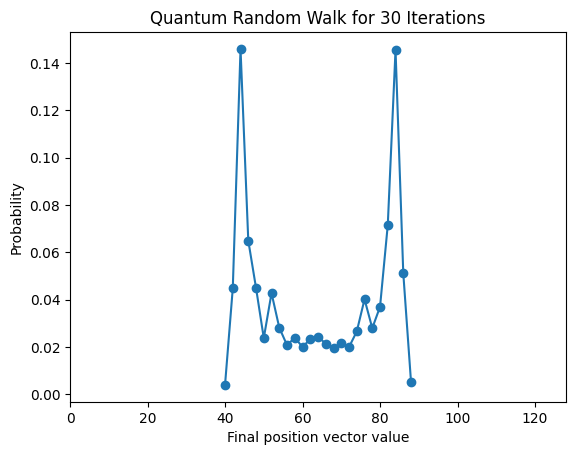

In [ ]:
def initial_state():

    # Initialize walker position in the middle
    yield cirq.X(cirq.LineQubit(0)) # Qubit 0 is MSB

    # Initialize coin qubit in a balanced state between |↑⟩ and |↓⟩
    # by applying Hadamard gate and Rotation of 90° around Z axis
    yield cirq.H(cirq.LineQubit(number_qubits))
    yield cirq.Rz(rads=0.5 * np.pi)(cirq.LineQubit(number_qubits))  # Rotation about Z

simulation_30_ROTZ_90 = simulate_circuit(number_qubits, iterations=30, sample_number=5000, plot=True, show_circ=True)

The repeated applications of the Hadamard gate to the coin qubit (which is initialized in the |0⟩ state) leads to interference. Over time, this interference causes the coin qubit to bias to the left. A initialization of the coin qubit in the |1⟩ state would lead to a bias to the right side.

To avoid that bias we can prepare the coin qubit in a "balanced" state by initializing it in the |0⟩ state, then appying the Hadamard gate and then additionally apply a rotation of 90° around the Z axis.

As we can see in the plot, this time the two peaks are almost equally high, leading to a symmetric probability distribution.

## Task B.3
Initialize the quantum walk in a superposition of two positions. Plot the distribution after 30 walk iterations. Compare the distribution to the distributions of Task B.2.

Initial walker position: 
Counter({96: 505, 32: 495})
Walker position after one step with coin in |0⟩ state: 
Counter({31: 262, 95: 262, 33: 248, 97: 228})
Walker position after one step with coin in |1⟩ state: 
Counter({97: 262, 33: 254, 95: 250, 31: 234})
Walker position after one step with coin in random state: 
Counter({95: 261, 33: 260, 97: 252, 31: 227})
0: ───H──────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────

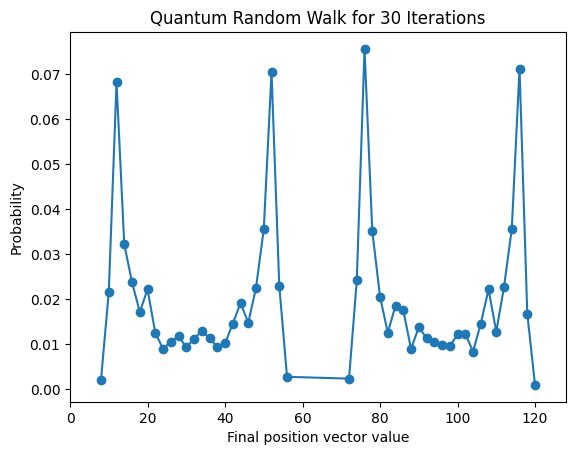

In [ ]:
def initial_state():

    # Initialize walker position in a superposition of two states
    yield cirq.X(cirq.LineQubit(1)) # Qubit 0 is MSB
    yield cirq.H(cirq.LineQubit(0))

    # Initialize coin qubit in a balanced state between |↑⟩ and |↓⟩
    # by applying Hadamard gate and Rotation of 90° around Z axis
    yield cirq.H(cirq.LineQubit(number_qubits))
    yield cirq.Rz(rads=0.5 * np.pi)(cirq.LineQubit(number_qubits))  # Rotation about Z

print('Initial walker position: ')
QW_state_initial = test_QW_circuit(number_qubits, iterations=0)
print('Walker position after one step with coin in |0⟩ state: ')
QW_state_one_direction = test_QW_circuit(number_qubits, iterations=1, coin=0)
print('Walker position after one step with coin in |1⟩ state: ')
QW_state_other_direction = test_QW_circuit(number_qubits, iterations=1, coin=1)
print('Walker position after one step with coin in random state: ')
QW_state_random_direction = test_QW_circuit(number_qubits, iterations=1)


simulation_30_ROTZ_90 = simulate_circuit(number_qubits, iterations=30, sample_number=5000, plot=True, show_circ=True)

In this case the walker is in the superposition of the initial positions 32 and 96. Due to this superposition of the initial states, the walker can equally likely end up in four different final positions. We observe a similar probability distribution as in task B.2 around both of the initial positions. Due to the fact that the initial positions are far enough away from each other, the two distributions do not overlap.

Initial walker position: 
Counter({64: 515, 72: 485})
Walker position after one step with coin in |0⟩ state: 
Counter({71: 266, 65: 262, 73: 238, 63: 234})
Walker position after one step with coin in |1⟩ state: 
Counter({71: 281, 73: 251, 65: 236, 63: 232})
Walker position after one step with coin in random state: 
Counter({63: 269, 65: 262, 71: 244, 73: 225})
0: ───X──────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────────────────────X───────X───────────────────────────────────────────────────────────────────────────────────────────

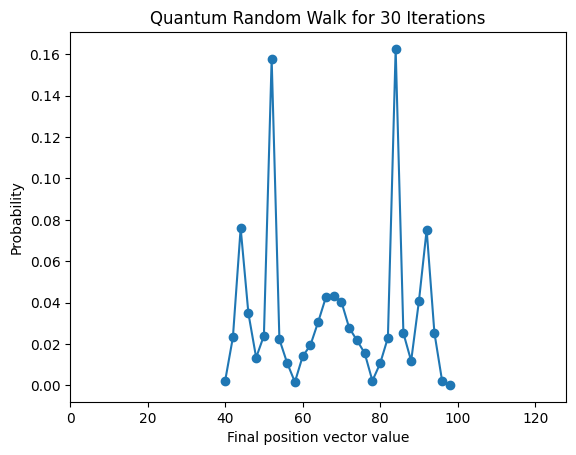

In [ ]:
def initial_state():

    # Initialize walker position in a superposition of two states
    yield cirq.X(cirq.LineQubit(0)) # Qubit 0 is MSB
    yield cirq.H(cirq.LineQubit(3))

    # Initialize coin qubit in a balanced state between |↑⟩ and |↓⟩
    # by applying Hadamard gate and Rotation of 90° around Z axis
    yield cirq.H(cirq.LineQubit(number_qubits))
    yield cirq.Rz(rads=0.5 * np.pi)(cirq.LineQubit(number_qubits))  # Rotation about Z

print('Initial walker position: ')
QW_state_initial = test_QW_circuit(number_qubits, iterations=0)
print('Walker position after one step with coin in |0⟩ state: ')
QW_state_one_direction = test_QW_circuit(number_qubits, iterations=1, coin=0)
print('Walker position after one step with coin in |1⟩ state: ')
QW_state_other_direction = test_QW_circuit(number_qubits, iterations=1, coin=1)
print('Walker position after one step with coin in random state: ')
QW_state_random_direction = test_QW_circuit(number_qubits, iterations=1)


simulation_30_ROTZ_90 = simulate_circuit(number_qubits, iterations=30, sample_number=5000, plot=True, show_circ=True)

In this case the walker is in the superposition of the initial positions 64 and 72. Here we can observe that the two distributions centered around the initial positions are overlapping.

## Task B.4
Explore what happens if you use a different coin operator, such as the ROTY. How does changing the coin operator affect the probability distribution? Can you design a biased quantum walk using this method?

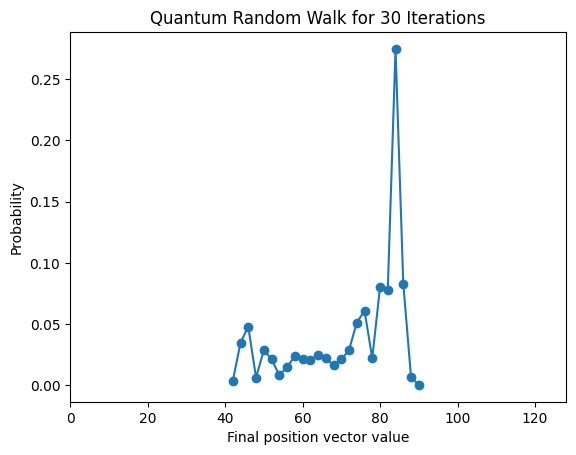

In [ ]:
def initial_state():

    # Initialize walker position in the middle
    yield cirq.X(cirq.LineQubit(0)) # Qubit 0 is MSB

    # Initialize coin qubit in a state between |↑⟩ and |↓⟩
    # by applying Hadamard gate and Rotation of 180° around Y axis
    yield cirq.H(cirq.LineQubit(number_qubits))
    yield cirq.Ry(rads=1 * np.pi)(cirq.LineQubit(number_qubits))  # Rotation about Y


simulation_30_ROTY_180 = simulate_circuit(number_qubits, iterations=30, sample_number=5000, plot=True)

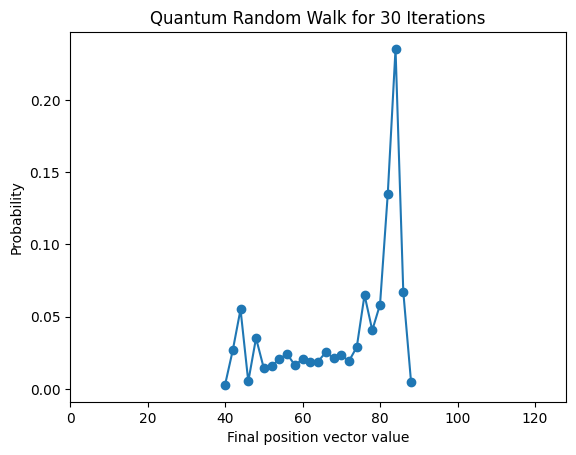

In [ ]:
def initial_state():

    # Initialize walker position in the middle
    yield cirq.X(cirq.LineQubit(0)) # Qubit 0 is MSB

    # Initialize coin qubit in a state between |↑⟩ and |↓⟩
    # by applying Hadamard gate and Rotation of 90° around Y axis
    yield cirq.H(cirq.LineQubit(number_qubits))
    yield cirq.Ry(rads=0.5 * np.pi)(cirq.LineQubit(number_qubits))  # Rotation about Y


simulation_30_ROTY_90 = simulate_circuit(number_qubits, iterations=30, sample_number=5000, plot=True)

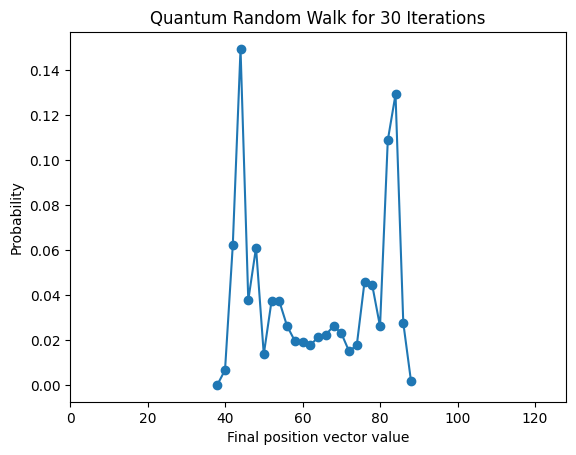

In [ ]:
def initial_state():

    # Initialize walker position in the middle
    yield cirq.X(cirq.LineQubit(0)) # Qubit 0 is MSB

    # Initialize coin qubit in a state between |↑⟩ and |↓⟩
    # by applying Hadamard gate and Rotation of 45° around Y axis
    yield cirq.H(cirq.LineQubit(number_qubits))
    yield cirq.Ry(rads=0.25 * np.pi)(cirq.LineQubit(number_qubits))  # Rotation about Y


simulation_30_ROTY_45 = simulate_circuit(number_qubits, iterations=30, sample_number=5000, plot=True)

We can see that manipulating the quantum state of the coin qubit by rotating it around the Y axis has an impact about the observed probability distribution of the quantum random walk. We observed an unbiased coin qubit for $R_Y=45°$, whereas a biased behaviour for $R_Y=90°$ or $R_Y=180°$.